In [2]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_excel('./data/combined_unique.xlsx')



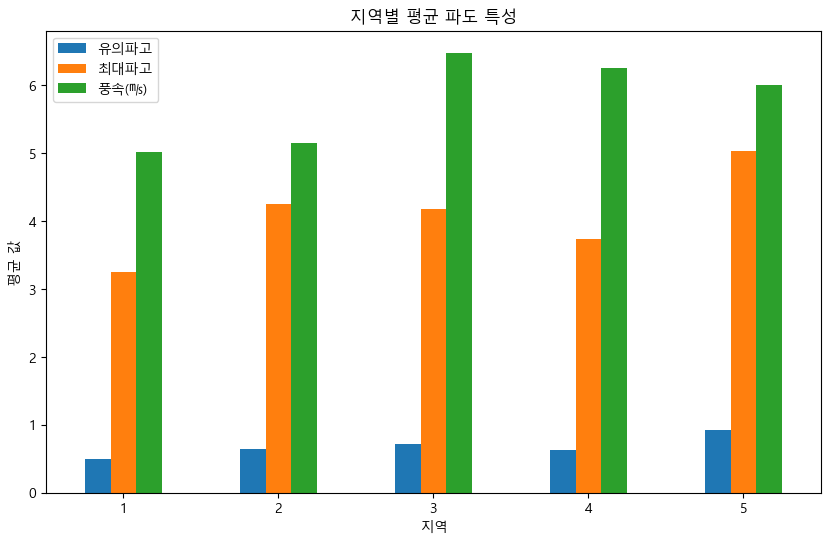

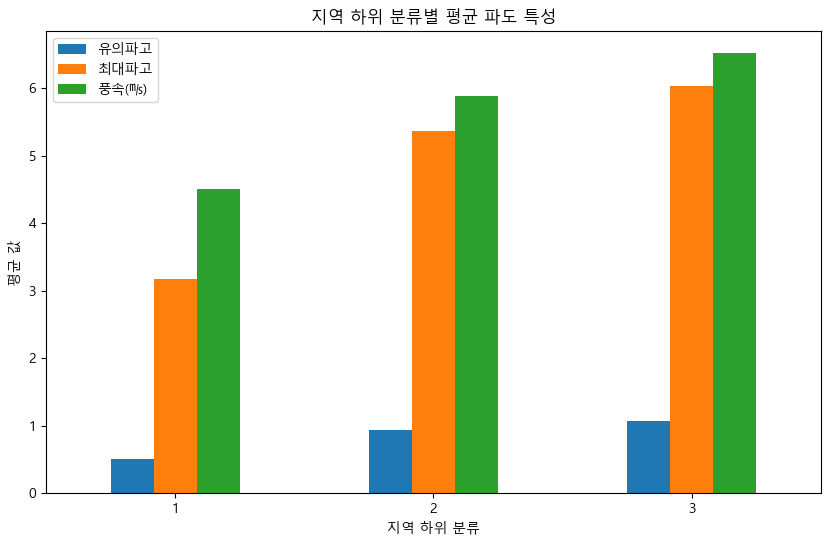

In [11]:
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
%matplotlib inline
# 한글 폰트 경로 설정
font_path = "C:/Windows/Fonts/malgun.ttf"  # 한글 폰트 경로에 맞게 수정해주세요
font_name = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font_name)

# 각 지역별 평균 파도 특성 데이터 생성 (예시)
df = pd.read_excel('./data/combined_unique.xlsx')

# 지역별 데이터 요약 통계
region_stats = df.groupby('region').agg({'유의파고': 'mean', '최대파고': 'mean', '풍속(㎧)': 'mean'})

# 지역 하위 분류별 데이터 요약 통계
sub_region_stats = df.groupby('region_sub').agg({'유의파고': 'mean', '최대파고': 'mean', '풍속(㎧)': 'mean'})

# 지역별 파도 특성 시각화
region_stats.plot(kind='bar', figsize=(10, 6))
plt.title('지역별 평균 파도 특성')
plt.xlabel('지역')
plt.ylabel('평균 값')
plt.xticks(rotation=0)
plt.legend(['유의파고', '최대파고', '풍속(㎧)'])
plt.show()

# 지역 하위 분류별 파도 특성 시각화
sub_region_stats.plot(kind='bar', figsize=(10, 6))
plt.title('지역 하위 분류별 평균 파도 특성')
plt.xlabel('지역 하위 분류')
plt.ylabel('평균 값')
plt.xticks(rotation=0)
plt.legend(['유의파고', '최대파고', '풍속(㎧)'])
plt.show()

In [34]:
years = sorted(df['year'].unique())
wave_height_yearly_mean = []

for year in years:
    year_data = df[df['year'] == year]
    yearly_mean = {
        'year': year,
        '연간유의파': year_data['유의파고'].mean(),
        'mean_maximum_wave_height': year_data['최대파고'].mean()
    }
    wave_height_yearly_mean.append(yearly_mean)

wave_height_yearly_mean_df = pd.DataFrame(wave_height_yearly_mean)

# 시각화
plt.figure(figsize=(10, 6))
plt.plot(wave_height_yearly_mean_df['year'], wave_height_yearly_mean_df['mean_significant_wave_height'], marker='o', label='Mean Significant Wave Height')
plt.plot(wave_height_yearly_mean_df['year'], wave_height_yearly_mean_df['mean_maximum_wave_height'], marker='o', label='Mean Maximum Wave Height')
plt.title('Yearly Mean Wave Heights')
plt.xlabel('Year')
plt.ylabel('Wave Height (m)')
plt.legend()
plt.grid(True)
plt.show()

KeyError: 'mean_significant_wave_height'